In [1]:
# Part 2: Clustering  
#Part 2A: PCA (Airquality Dataset)

In [2]:
# for data handling
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt

# for data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# for model selection and splitting
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# for model evaluation metrics
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score

In [3]:
#Part 2A: PCA (Airquality Dataset)

In [4]:
#1 and #2 Get the dataset and load the dataset

In [5]:
air_quality_data = pd.read_excel('airquality/AirQualityUCI.xlsx')
air_quality_data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550,0.513866
9356,2005-04-04,14:00:00,2.2,1070.75,-200,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500,13.125,0.502804


In [6]:
#3 Describe the data
print("DATASET (Air Quality) DESCRIPTION")
print(air_quality_data.describe().transpose()) 

DATASET (Air Quality) DESCRIPTION
                count                           mean                  min  \
Date             9357  2004-09-21 04:30:05.193972480  2004-03-10 00:00:00   
CO(GT)         9357.0                     -34.207524               -200.0   
PT08.S1(CO)    9357.0                    1048.869652               -200.0   
NMHC(GT)       9357.0                    -159.090093               -200.0   
C6H6(GT)       9357.0                       1.865576               -200.0   
PT08.S2(NMHC)  9357.0                     894.475963               -200.0   
NOx(GT)        9357.0                       168.6042               -200.0   
PT08.S3(NOx)   9357.0                     794.872333               -200.0   
NO2(GT)        9357.0                      58.135898               -200.0   
PT08.S4(NO2)   9357.0                    1391.363266               -200.0   
PT08.S5(O3)    9357.0                     974.951534               -200.0   
T              9357.0                     

In [7]:
print("DATASET (Air Quality) INFORMATION")
print(air_quality_data.info())

DATASET (Air Quality) INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64

In [8]:
#4 Preprocess and split the data into training and testing sets. 

#Convert date and time into numerical data
    # Convert datetime64 to string
    # Convert string to numeric (timestamp)
#Dropping date and time column

air_quality_data["DateTime"]=pd.to_datetime(air_quality_data["Date"].astype(str)+" "+air_quality_data["Time"].astype(str))
air_quality_data["DateTime"]=air_quality_data["DateTime"].astype('int64') // 10**9
print(air_quality_data.tail())


           Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
9352 2005-04-04  10:00:00     3.1      1314.25      -200  13.529605   
9353 2005-04-04  11:00:00     2.4      1162.50      -200  11.355157   
9354 2005-04-04  12:00:00     2.4      1142.00      -200  12.374538   
9355 2005-04-04  13:00:00     2.1      1002.50      -200   9.547187   
9356 2005-04-04  14:00:00     2.2      1070.75      -200  11.932060   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
9352        1101.25    471.7        538.50    189.8       1374.25   
9353        1027.00    353.3        603.75    179.2       1263.50   
9354        1062.50    293.0        603.25    174.7       1240.75   
9355         960.50    234.5        701.50    155.7       1041.00   
9356        1047.25    265.2        654.00    167.7       1128.50   

      PT08.S5(O3)       T      RH        AH    DateTime  
9352      1728.50  21.850  29.250  0.756824  1112608800  
9353      1269.00  24.325  23.725  0.71186

In [9]:
air_quality_data = air_quality_data.drop(["Date","Time"], axis=1)
air_quality_data.tail()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
9352,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250,0.756824,1112608800
9353,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725,0.711864,1112612400
9354,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350,0.640649,1112616000
9355,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550,0.513866,1112619600
9356,2.2,1070.75,-200,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500,13.125,0.502804,1112623200


In [10]:
# Normalize Dataset
m_m_s=MinMaxScaler()
normalize_aq_data=pd.DataFrame(m_m_s.fit_transform(air_quality_data), columns=air_quality_data.columns)
normalize_aq_data.tail()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
9352,0.958471,0.676080,0.0,0.809617,0.539043,0.400060,0.256179,0.722253,0.529160,0.708291,0.906991,0.794008,0.992710,0.999572
9353,0.955168,0.608327,0.0,0.801372,0.508285,0.329541,0.278814,0.702613,0.491933,0.539528,0.917110,0.774872,0.992488,0.999679
9354,0.955168,0.599174,0.0,0.805238,0.522991,0.293627,0.278640,0.694275,0.484286,0.474520,0.927637,0.756256,0.992136,0.999786
9355,0.953752,0.536890,0.0,0.794517,0.480737,0.258785,0.312722,0.659070,0.417143,0.356166,0.933463,0.739631,0.991509,0.999893
9356,0.954224,0.567362,0.0,0.803560,0.516674,0.277070,0.296245,0.681304,0.446555,0.373152,0.934178,0.738159,0.991454,1.000000


In [11]:
#Split the dataset
features_aq_train, features_aq_test,=train_test_split(normalize_aq_data,test_size=0.2,random_state=42)
print(features_aq_train.describe().transpose())
print(features_aq_test.describe().transpose())

                count      mean       std       min       25%       50%  \
CO(GT)         7485.0  0.781289  0.367402  0.000000  0.946673  0.950920   
PT08.S1(CO)    7485.0  0.557503  0.147300  0.000000  0.501060  0.559214   
NMHC(GT)       7485.0  0.028749  0.099065  0.000000  0.000000  0.000000   
C6H6(GT)       7485.0  0.765238  0.157181  0.000000  0.773367  0.788221   
PT08.S2(NMHC)  7485.0  0.453215  0.141860  0.000000  0.376553  0.453397   
NOx(GT)        7485.0  0.219271  0.154022  0.000000  0.148303  0.202501   
PT08.S3(NOx)   7485.0  0.345195  0.112095  0.000000  0.290868  0.344896   
NO2(GT)        7485.0  0.476900  0.236437  0.000000  0.468779  0.548453   
PT08.S4(NO2)   7485.0  0.534662  0.156909  0.000000  0.465462  0.552773   
PT08.S5(O3)    7485.0  0.431550  0.167773  0.000000  0.331007  0.419429   
T              7485.0  0.857281  0.176910  0.000000  0.862428  0.887708   
RH             7485.0  0.829820  0.177800  0.000000  0.811759  0.861460   
AH             7485.0  0.

In [12]:
#5 Initialize PCA  
pca_aq=PCA()
pca_aq.fit(features_aq_train)

pca_aq.explained_variance_ratio_

array([3.49361022e-01, 3.28762254e-01, 1.57385721e-01, 8.85686302e-02,
       3.74058954e-02, 1.51961462e-02, 8.61409637e-03, 5.17104081e-03,
       4.55556830e-03, 1.97343386e-03, 1.63682833e-03, 1.21485202e-03,
       1.39585158e-04, 1.49268231e-05])

Text(0.5, 1.0, 'Value of Variance by Components')

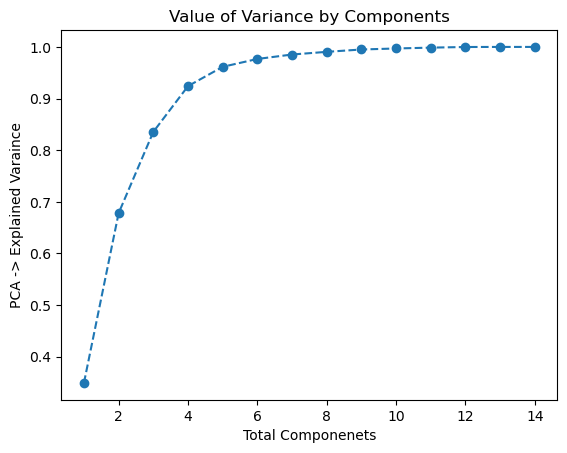

In [13]:
#Plotting the graph for understanding the relationship between numbers of componenets and explained variance ratio
s_x = range(1,len(pca_aq.explained_variance_ratio_)+1)
s_y = pca_aq.explained_variance_ratio_.cumsum()
plt.figure()
plt.plot(s_x,s_y,marker="o",linestyle="--")
plt.xlabel("Total Componenets")
plt.ylabel("PCA -> Explained Varaince")
plt.title("Value of Variance by Components")

In [14]:
#Reducing dimensions to 9
pca_aq=PCA(n_components=9)

#6 Fit PCA on the training data and transform the data  
features_aq_train_pca=pca_aq.fit_transform(features_aq_train)

#7 Transform the data  
features_aq_test_pca=pca_aq.transform(features_aq_test)
print(features_aq_train_pca[0])
print(features_aq_test_pca[0])

[ 1.02807251 -1.69368566 -0.3422022   0.02362632 -0.54022735 -0.002047
  0.00246397 -0.01291518  0.04730481]
[ 0.0426568   0.06676238 -0.23579293 -0.11698     0.03661336 -0.08979687
 -0.02576911 -0.0021877  -0.02878149]


[4019.391934603338, 2763.8016447222403, 2217.3415573360644, 1071.7661720874166, 885.0735360056676, 799.3556854752076, 765.9809353246293, 655.6008908102752, 587.0663291811396, 523.8605481069031, 489.36932202278183, 454.7708526432423, 450.12628924971756, 412.1949717681705, 403.6142807635765]


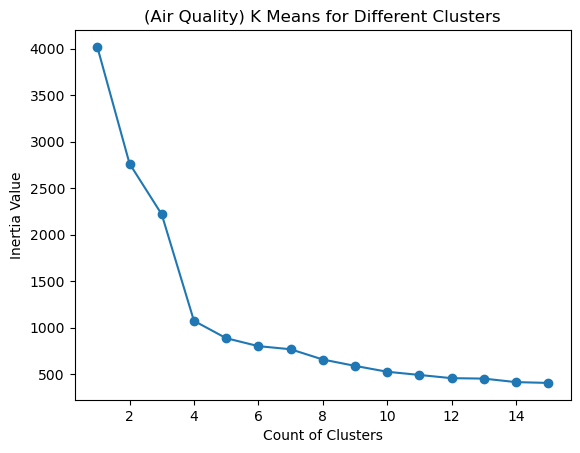

In [15]:
#Plotting Graph
km_aq=[]
for i in range(1,16):
    kmeans_pca_aq=KMeans(n_clusters=i)
    kmeans_pca_aq.fit(features_aq_train_pca)
    km_aq.append(kmeans_pca_aq.inertia_)

print(km_aq)
plt.figure()
plt.xlabel("Count of Clusters")
plt.ylabel("Inertia Value")
plt.plot(range(1,16),km_aq,marker="o")
plt.title("(Air Quality) K Means for Different Clusters")
plt.show()

In [16]:
#8 Make predictions 
#Applying kmeans on PCA training data

kmeans_pca=KMeans(n_clusters=4)
kmeans_pca.fit(features_aq_train_pca)
predicted_data=kmeans_pca.predict(features_aq_test_pca)
print(predicted_data)

[1 2 3 ... 1 3 2]


In [17]:
#9 Evaluate the model and provide accuracy score  

s_score=silhouette_score(features_aq_test_pca,predicted_data)
print("Silhouette Score: "+str(s_score))

Silhouette Score: 0.4187772344626672


In [18]:
db_score=davies_bouldin_score(features_aq_test_pca,predicted_data)
print("Davies Bouldin Score: "+str(db_score))

Davies Bouldin Score: 0.8059838820917183


In [19]:
ch_score=calinski_harabasz_score(features_aq_test_pca,predicted_data)
print("Calinski Harabasz Score: "+str(ch_score))

Calinski Harabasz Score: 1744.9067259491756
